In [ ]:
# this script is suppoed to be executed from colb.research.google.com
# if an execution from localhost is necessary, please modify the path of the images so that there will be no error

In [ ]:
pip install opencv-contrib-python --upgrade

     |████████████████████████████████| 55.7MB 66kB/s 
  Found existing installation: opencv-contrib-python 4.1.2.30
    Uninstalling opencv-contrib-python-4.1.2.30:
      Successfully uninstalled opencv-contrib-python-4.1.2.30


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pip install patool

     |████████████████████████████████| 81kB 5.1MB/s eta 0:00:011


In [ ]:
#!rm -r datasetProjetS5_2020/

In [ ]:
# decompressing the file containing the images
import patoolib
patoolib.extract_archive("drive/MyDrive/datasetProjetS5_2020.rar", outdir=".")

patool: Extracting drive/MyDrive/datasetProjetS5_2020.rar ...
patool: running /usr/bin/unrar x -- /content/drive/MyDrive/datasetProjetS5_2020.rar
patool:     with cwd='.'
patool: ... drive/MyDrive/datasetProjetS5_2020.rar extracted to `.'.


'.'

In [ ]:
# deleting the directory that dosn't contain leafs (Background_without_leaves)
import shutil
shutil.rmtree('datasetProjetS5_2020/train/Background_without_leaves/')
shutil.rmtree('datasetProjetS5_2020/test/Background_without_leaves/')
shutil.rmtree('datasetProjetS5_2020/valid/Background_without_leaves/')

In [ ]:
import os
import cv2
import matplotlib.pyplot as plt

# in this script, we will extract the bag of features from every class using the KMeans algorithm

path_train = 'datasetProjetS5_2020/train/'

files = os.listdir(path_train)
dictionary_hist = []

BOW = cv2.BOWKMeansTrainer(1)

for directory in files:
    print('loading', directory, end="...")
    imgs = os.listdir(path_train + directory)
    for img in imgs:
        sift_img = cv2.imread(path_train + directory + "/" + img)
        sift = cv2.SIFT_create()
        gray = cv2.cvtColor(sift_img, cv2.COLOR_BGR2GRAY)
        kp, des = sift.detectAndCompute(gray, None)
        if des is not None:
          BOW.add(des)
    dictionary_hist.append(BOW.cluster())
    print('100%')

loading Peach___healthy...100%
loading Strawberry___Leaf_scorch...100%
loading Apple___Apple_scab...100%
loading Squash___Powdery_mildew...100%
loading Grape___Leaf_blight_(Isariopsis_Leaf_Spot)...100%
loading Tomato___Leaf_Mold...100%
loading Potato___Late_blight...100%
loading Tomato___Septoria_leaf_spot...100%
loading Tomato___Late_blight...100%
loading Pepper,_bell___Bacterial_spot...100%
loading Apple___healthy...100%
loading Tomato___Spider_mites Two-spotted_spider_mite...100%
loading Raspberry___healthy...100%
loading Blueberry___healthy...100%
loading Cherry___Powdery_mildew...100%
loading Corn___Northern_Leaf_Blight...100%
loading Pepper,_bell___healthy...100%
loading Potato___Early_blight...100%
loading Apple___Black_rot...100%
loading Grape___Black_rot...100%
loading Grape___healthy...100%
loading Corn___Common_rust...100%
loading Cherry___healthy...100%
loading Corn___healthy...100%
loading Tomato___Early_blight...100%
loading Tomato___Bacterial_spot...100%
loading Soybean_

In [ ]:
import numpy as np

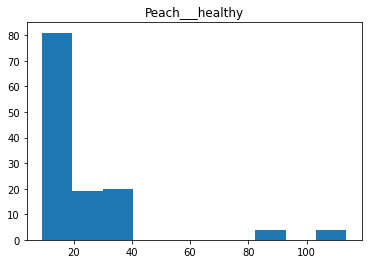

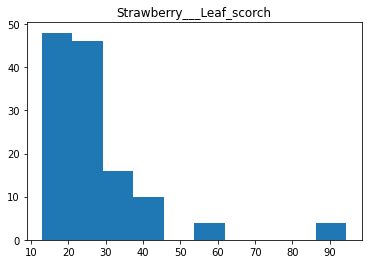

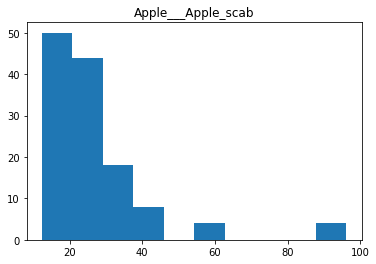

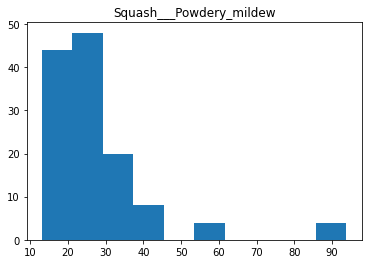

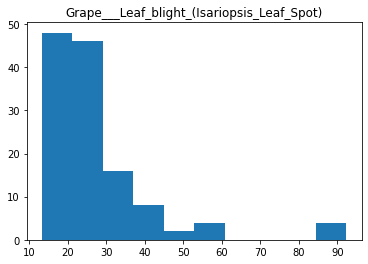

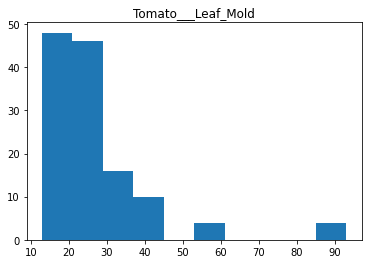

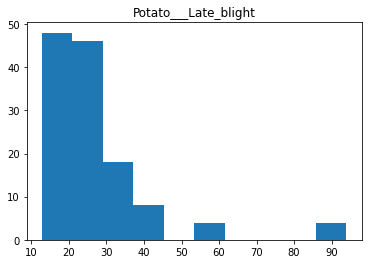

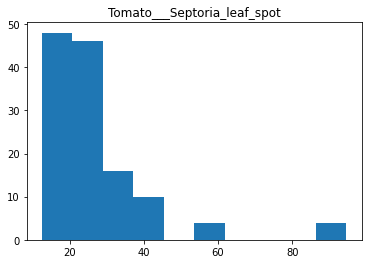

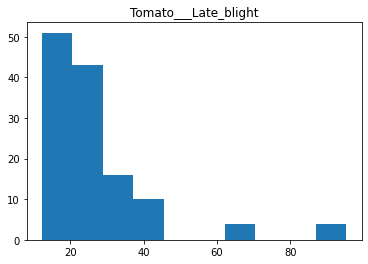

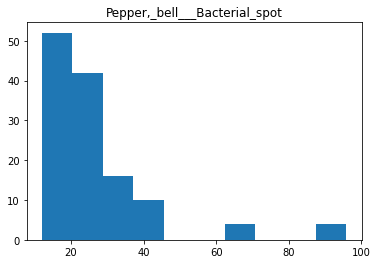

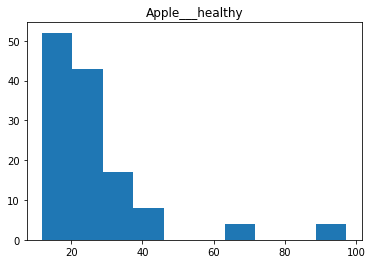

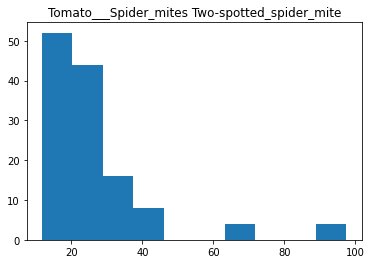

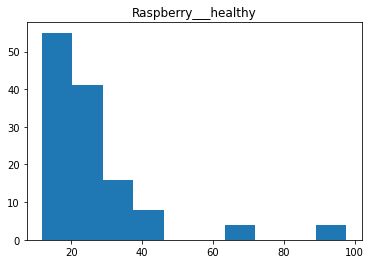

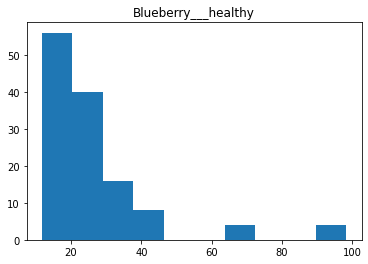

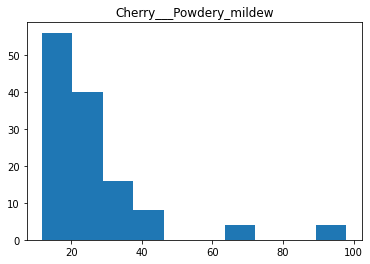

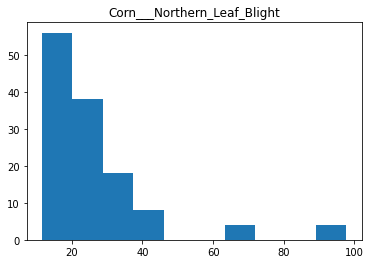

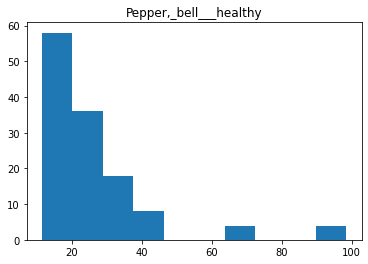

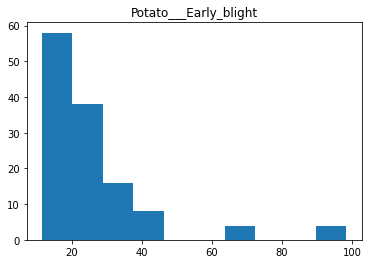

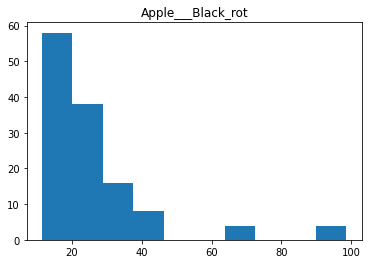

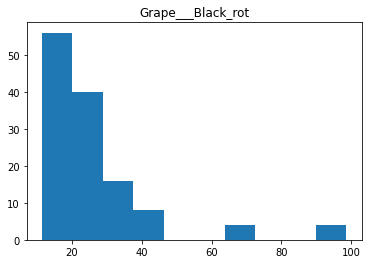

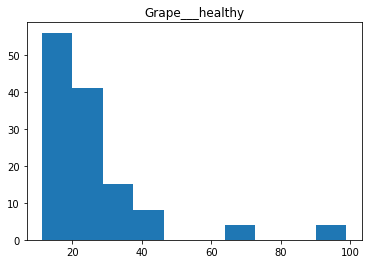

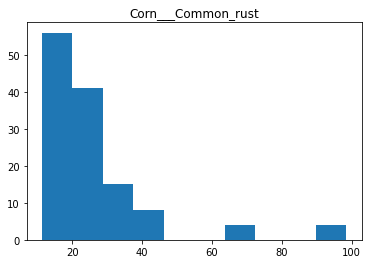

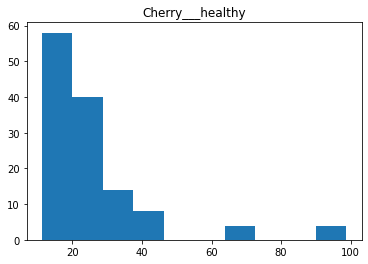

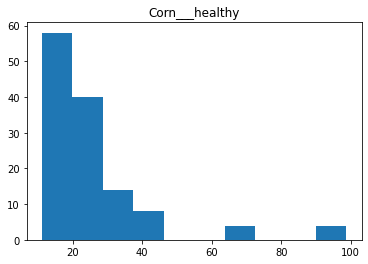

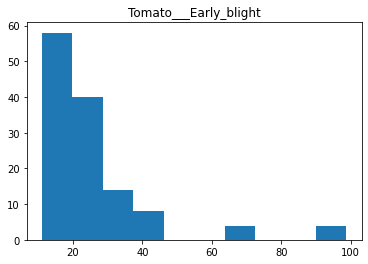

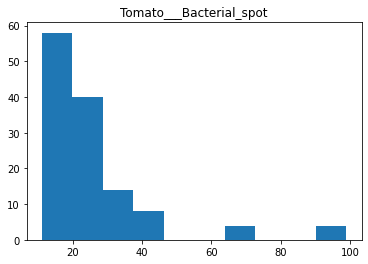

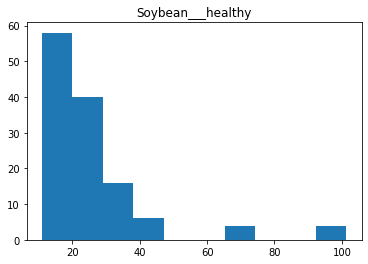

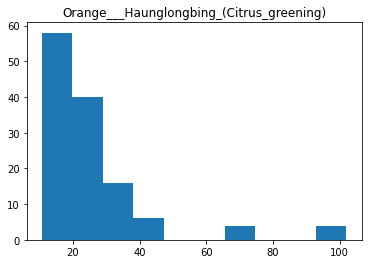

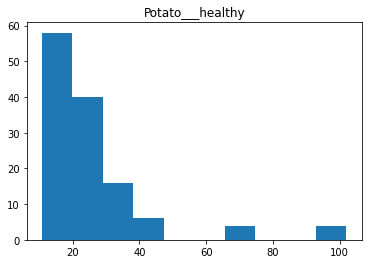

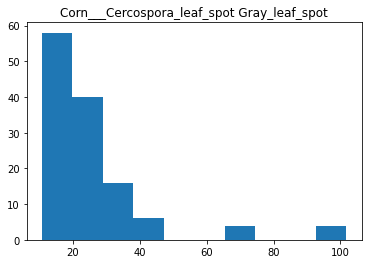

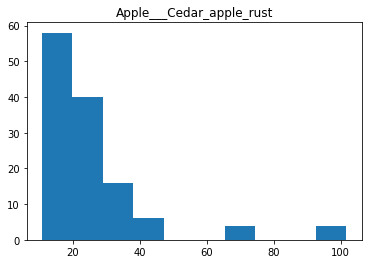

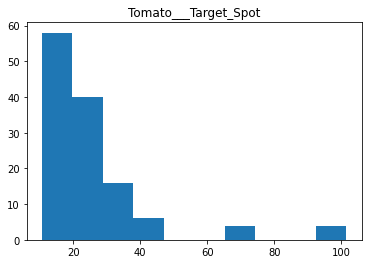

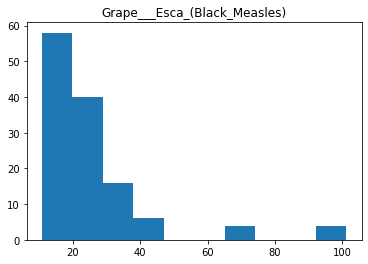

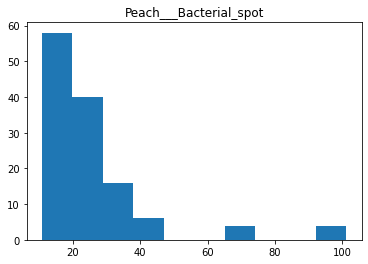

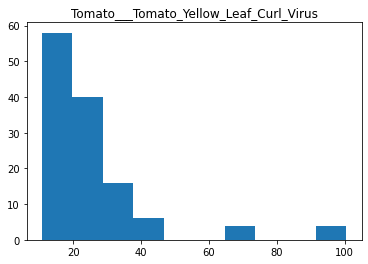

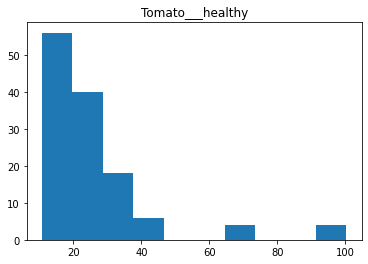

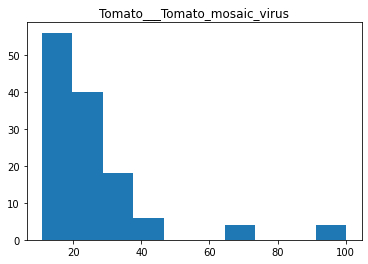

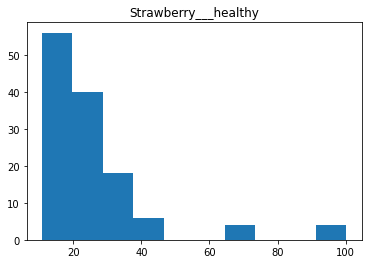

In [ ]:
# showing the histogram of every class

reshaped_dictionary_hist = np.array(dictionary_hist).reshape((len(dictionary_hist), len(dictionary_hist[0][0])))
for i in range(len(files)):
    plt.hist(reshaped_dictionary_hist[i])
    plt.title(files[i])
    plt.show()


In [ ]:
# now, we just finished the histogram part, it's used only to visually see the description of the classes

In [ ]:
import os
import cv2
import matplotlib.pyplot as plt

path_train = 'datasetProjetS5_2020/train/'

files = os.listdir(path_train)
xtrain = []
ytrain = []

# in this time, this script will extract the bag of features of every single image

for directory in files:
    print('loading', directory, end="...")
    imgs = os.listdir(path_train + directory)
    for img in imgs:
        sift_img = cv2.imread(path_train + directory + "/" + img)
        sift = cv2.SIFT_create()
        gray = cv2.cvtColor(sift_img, cv2.COLOR_BGR2GRAY)
        kp, des = sift.detectAndCompute(gray, None)
        if des is not None:
          BOW = cv2.BOWKMeansTrainer(1)
          BOW.add(des)
          xtrain.append(BOW.cluster())
          ytrain.append(directory)
    print('100%')

loading Peach___healthy...100%
loading Strawberry___Leaf_scorch...100%
loading Apple___Apple_scab...100%
loading Squash___Powdery_mildew...100%
loading Grape___Leaf_blight_(Isariopsis_Leaf_Spot)...100%
loading Tomato___Leaf_Mold...100%
loading Potato___Late_blight...100%
loading Tomato___Septoria_leaf_spot...100%
loading Tomato___Late_blight...100%
loading Pepper,_bell___Bacterial_spot...100%
loading Apple___healthy...100%
loading Tomato___Spider_mites Two-spotted_spider_mite...100%
loading Raspberry___healthy...100%
loading Blueberry___healthy...100%
loading Cherry___Powdery_mildew...100%
loading Corn___Northern_Leaf_Blight...100%
loading Pepper,_bell___healthy...100%
loading Potato___Early_blight...100%
loading Apple___Black_rot...100%
loading Grape___Black_rot...100%
loading Grape___healthy...100%
loading Corn___Common_rust...100%
loading Cherry___healthy...100%
loading Corn___healthy...100%
loading Tomato___Early_blight...100%
loading Tomato___Bacterial_spot...100%
loading Soybean_

In [ ]:
# sometimes, in rare cases, the bag of features are not well calculated
# because of the discontinuity of the image pixels when executing the KMeans algorithm
# so we need to clean and remove the bad bag of features
# in this script, new lists: cleaned_xtrain and cleaned_ytrain will contain only the correct bag of features

elements_to_pop = [i for i in range(len(xtrain)) if len(xtrain[i][0]) != 128]
elements_to_pop.reverse()
cleaned_xtrain = xtrain.copy()
cleaned_ytrain = ytrain.copy()
for i in elements_to_pop:
  cleaned_xtrain.pop(i)
  cleaned_ytrain.pop(i)
cleaned_xtrain = np.array(cleaned_xtrain).reshape((len(cleaned_xtrain), 128))

In [ ]:
from sklearn.svm import SVC

# with sklearn, we train the SVC model using the previously extracted bag of features from the images

clf = SVC()
clf.fit(cleaned_xtrain , cleaned_ytrain)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
from sklearn.externals import joblib

# saving the model, the cleaned_xtrain and the cleaned_ytrain to prevent the long execution of fiting a new model

joblib.dump((clf, cleaned_xtrain, cleaned_ytrain), "bovw.pkl", compress=3)

/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


['bovw.pkl']

In [ ]:
import os
import cv2
import matplotlib.pyplot as plt


# finally, we extract the bag of features from the text images

path_test = 'datasetProjetS5_2020/test/'

files_test = os.listdir(path_test)
xtest = []
ytest = []



for directory in files_test:
    print('loading', directory, end="...")
    imgs = os.listdir(path_test + directory)
    for img in imgs:
        sift_img = cv2.imread(path_test + directory + "/" + img)
        sift = cv2.SIFT_create()
        gray = cv2.cvtColor(sift_img, cv2.COLOR_BGR2GRAY)
        kp, des = sift.detectAndCompute(gray, None)
        if des is not None:
          BOW_test = cv2.BOWKMeansTrainer(1)
          BOW_test.add(des)
          xtest.append(BOW_test.cluster())
          ytest.append(directory)
    print('100%')

loading Peach___healthy...100%
loading Strawberry___Leaf_scorch...100%
loading Apple___Apple_scab...100%
loading Squash___Powdery_mildew...100%
loading Grape___Leaf_blight_(Isariopsis_Leaf_Spot)...100%
loading Tomato___Leaf_Mold...100%
loading Potato___Late_blight...100%
loading Tomato___Septoria_leaf_spot...100%
loading Tomato___Late_blight...100%
loading Pepper,_bell___Bacterial_spot...100%
loading Apple___healthy...100%
loading Tomato___Spider_mites Two-spotted_spider_mite...100%
loading Raspberry___healthy...100%
loading Blueberry___healthy...100%
loading Cherry___Powdery_mildew...100%
loading Corn___Northern_Leaf_Blight...100%
loading Pepper,_bell___healthy...100%
loading Potato___Early_blight...100%
loading Apple___Black_rot...100%
loading Grape___Black_rot...100%
loading Grape___healthy...100%
loading Corn___Common_rust...100%
loading Cherry___healthy...100%
loading Corn___healthy...100%
loading Tomato___Early_blight...100%
loading Tomato___Bacterial_spot...100%
loading Soybean_

In [ ]:
# we clean the list from the bad bag of features again

elements_to_pop = [i for i in range(len(xtest)) if len(xtest[i][0]) != 128]
elements_to_pop.reverse()
cleaned_xtest = xtest.copy()
cleaned_ytest = ytest.copy()
for i in elements_to_pop:
  cleaned_xtest.pop(i)
  cleaned_ytest.pop(i)
cleaned_xtest = np.array(cleaned_xtest).reshape((len(cleaned_xtest), 128))

In [ ]:
# here is the result, the score of the trained model that gives us 2/3 change of success of the prediction
clf.score(cleaned_xtest, cleaned_ytest)

0.6669142910205219